In [1]:
!pip install emoji

     |████████████████████████████████| 51kB 1.7MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42176 sha256=ec106230c1fec3ac20d3109ce1d404b0fc032743d46d52f46f04beecce03b73c
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji


In [0]:
import tweepy
import numpy as np
import pandas as pd
import re
import emoji
import csv
import pickle

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
#authorisation

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# Step 1 - Authenticate
consumer_key= 'SMVEA3MypMkgOeAGjn75N0gHJ'
consumer_secret= 'skaKGnyqPpzGO9PHubYaEVygai6fQB95ZkZQJrFFYaJfXZvI8J'

access_token='715755192994643968-NgdBmvMLFm7QotE1sZezym6daI0WyOD'
access_token_secret='d9B1xOXUzlgNyGa8Zyex09V6sTz4RUS5a4yPVqwCyiNRV'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

#Step2 - Call the API
api = tweepy.API(auth,wait_on_rate_limit=True)

# test authentication
try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [0]:
def preprocess_tweet(tweet):
	tweet.lower()
	tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
	tweet = re.sub('@[^\s]+','AT_USER', tweet)
	tweet = re.sub('[\s]+', ' ', tweet)
	tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
	tweet = (emoji.demojize(tweet))
	tweet = re.sub("\s:"," ", tweet)
	tweet = re.sub(":"," ", tweet)
	
	#removing mentions
	tweet = re.sub(r':', '', tweet)
	tweet = re.sub(r'‚Ä¶', '', tweet)
	
	#replace consecutive non-ASCII characters with a space
	tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
	tweet = re.sub(r"""
              [,.;@#?!&$"']+
              \ *  
              """,
              " ", 
              tweet, flags=re.VERBOSE)

	return tweet

In [0]:
import pandas as pd
import re
import emoji

msgs = []
msg =[]
count = 0
number_of_tweets = 2000

for tweet in tweepy.Cursor(api.search, q='#corona', rpp=100, lang="en", tweet_mode='extended').items(number_of_tweets):
    tweet_text = tweet.full_text
    geo = tweet.coordinates
    if(geo == None):
        continue
    longitude = geo['coordinates'][0]
    latitude = geo['coordinates'][1]
    tweet_text = (emoji.demojize(tweet_text))
    tweet_text = re.sub("\s:"," ", tweet_text)
    tweet_text = re.sub(":"," ", tweet_text)
    clean_text = re.sub(r"""
               [,.;@#?!&$"']+
               \ *  
               """,
               " ", 
               tweet_text, flags=re.VERBOSE)
    #clean_text = "\"" + clean_text + "\""
    #location = "\"" + location + "\""
    msg = [clean_text, longitude, latitude, 0] 
    msg = tuple(msg)                    
    msgs.append(msg)

df = pd.DataFrame(msgs)

# New Section

In [0]:
print(len(msgs))

13


In [0]:
print(msgs[0])

('Link in the Bio for Full Eps \nhttps //t co/mLfFMXT0my \nSUBSCRIBE LIKE SHARE COMMENT \n podcast\n zmbsqd \n zombieapocalypse\n glennericnelson\n glennericnelson\n comics \n quarantine \n nvrdun\n isolation \n corona… https //t co/9hy86wPncE', -77.2342, 39.0972, 0)


In [0]:
print(msgs[2][0])

What I like about photographs is that they capture a moment that’s gone forever impossible to reproduce 
 kisumupacho  Cropshot_photography 
 photography  pokemon  corona  Kisumu City lakeside https //t co/zjW1TlMHrT


In [0]:
df = pd.DataFrame(msgs, columns = ['Text', 'Longitude', 'Latitude', 'Sentiment']) 

In [0]:
print(df.head)

<bound method NDFrame.head of                                                  Text  ...  Sentiment
0   Link in the Bio for Full Eps \nhttps //t co/mL...  ...          0
1    بيان  وزارة  الصحة  المصرية  بشأن  فيروس  كور...  ...          0
2   What I like about photographs is that they cap...  ...          0
3    \nTHE NHS WARRIOR \n \n \n plaguedaze  NHS  n...  ...          0
4   The gardener after 91 dahlias potted up   gard...  ...          0
5   Blowout \n \n \n covid  corona not  blowup  ny...  ...          0
6   How fearful witch  Corona making no movement r...  ...          0
7   Protect others and yourself Vote \nFace coveri...  ...          0
8   Quarantine Day 19-  Lunch  Coz you need some G...  ...          0
9   Coronavirus | BigBrother \n coronavirus  coron...  ...          0
10  This Corona work life got me lookin’ like self...  ...          0
11  P E A C E  I T  T O G E T H E R  green_heart \...  ...          0
12  Day 28 Lockdown Training 10km Row  amp Press U...  ...  

In [0]:
df.to_csv (r'/content/gdrive/My Drive/dmw_project/tweet_data.csv', index = False, header=True)

In [0]:
df.head

<bound method NDFrame.head of                                                  Text  ...  Sentiment
0   Link in the Bio for Full Eps \nhttps //t co/mL...  ...          0
1    بيان  وزارة  الصحة  المصرية  بشأن  فيروس  كور...  ...          0
2   What I like about photographs is that they cap...  ...          0
3    \nTHE NHS WARRIOR \n \n \n plaguedaze  NHS  n...  ...          0
4   The gardener after 91 dahlias potted up   gard...  ...          0
5   Blowout \n \n \n covid  corona not  blowup  ny...  ...          0
6   How fearful witch  Corona making no movement r...  ...          0
7   Protect others and yourself Vote \nFace coveri...  ...          0
8   Quarantine Day 19-  Lunch  Coz you need some G...  ...          0
9   Coronavirus | BigBrother \n coronavirus  coron...  ...          0
10  This Corona work life got me lookin’ like self...  ...          0
11  P E A C E  I T  T O G E T H E R  green_heart \...  ...          0
12  Day 28 Lockdown Training 10km Row  amp Press U...  ...  

In [0]:
emo_repl = {
    #good emotions
    "&lt;3" : " good ",
    ":d" : " good ",
    ":dd" : " good ",
    ":p" : " good ",
    "8)" : " good ",
    ":-)" : " good ",
    ":)" : " good ",
    ";)" : " good ",
    "(-:" : " good ",
    "(:" : " good ",
    
    "yay!" : " good ",
    "yay" : " good ",
    "yaay" : " good ",
    "yaaay" : " good ",
    "yaaaay" : " good ",
    "yaaaaay" : " good ",    
    #bad emotions
    ":/" : " bad ",
    ":&gt;" : " sad ",
    ":')" : " sad ",
    ":-(" : " bad ",
    ":(" : " bad ",
    ":s" : " bad ",
    ":-s" : " bad "
}

emo_repl2 = {
    #good emotions
    "&lt;3" : " heart ",
    ":d" : " smile ",
    ":p" : " smile ",
    ":dd" : " smile ",
    "8)" : " smile ",
    ":-)" : " smile ",
    ":)" : " smile ",
    ";)" : " smile ",
    "(-:" : " smile ",
    "(:" : " smile ",
       
    #bad emotions
    ":/" : " worry ",
    ":&gt;" : " angry ",
    ":')" : " sad ",
    ":-(" : " sad ",
    ":(" : " sad ",
    ":s" : " sad ",
    ":-s" : " sad "
}

#general
re_repl = {
    r"\br\b" : "are",
    r"\bu\b" : "you",
    r"\bhaha\b" : "ha",
    r"\bhahaha\b" : "ha",
    r"\bdon't\b" : "do not",
    r"\bdoesn't\b" : "does not",
    r"\bdidn't\b" : "did not",
    r"\bhasn't\b" : "has not",
    r"\bhaven't\b" : "have not",
    r"\bhadn't\b" : "had not",
    r"\blol\b" : "laugh",
    r"\bwon't\b" : "will not",
    r"\bwouldn't\b" : "would not",
    r"\bcan't\b" : "can not",
    r"\bcannot\b" : "can not"    
}

emo_repl_order = [k for (k_len,k) in reversed(sorted([(len(k),k) for k in emo_repl.keys()]))]
emo_repl_order2 = [k for (k_len,k) in reversed(sorted([(len(k),k) for k in emo_repl2.keys()]))]

def replace_emo(sentence):
    sentence2 = sentence
    for k in emo_repl_order:
        sentence2 = sentence2.replace(k,emo_repl[k])
    for r in re_repl:
        repl = re_repl[r]
        sentence2 = re.sub(r,repl,sentence2)
    return sentence2

def replace_reg(sentence):
    sentence2 = sentence
    for k in emo_repl_order2:
        sentence2 = sentence2.replace(k,emo_repl2[k])
    for r in re_repl:
        repl = re_repl[r]
        sentence2 = re.sub(r,repl,sentence2)
    return sentence2

def example():
    op = replace_emo("Hello how are you. Seems you didn't get the answer yet. lol :-) ! ")
    print(op)
    
new_msgs = []
for msg in msgs:
    text = replace_emo(msg[0])
    longitude = msg[1]
    latitude = msg[2]
    sentiment = msg[3]
    msg1 = [text, longitude, latitude, sentiment] 
    msg1 = tuple(msg1)                    
    new_msgs.append(msg1)

In [0]:
df = pd.DataFrame(msgs, columns = ['Text', 'Longitude', 'Latitude', 'Sentiment']) 
df.to_csv (r'/content/gdrive/My Drive/dmw_project/tweet_data_no_emotion.csv', index = False, header=True)

In [0]:
import numpy as np
import csv
import re

def translator(user_string):
    user_string = user_string.split(" ")
    j = 0
    for _str in user_string:
        fileName = "/content/gdrive/My Drive/dmw_project/slang.txt"
        accessMode = "r"
        with open(fileName, accessMode) as myCSVfile:
            dataFromFile = csv.reader(myCSVfile, delimiter="=")
            _str = re.sub('[^a-zA-Z0-9-_.]', '', _str)
            for row in dataFromFile:
                if _str.upper() == row[0]:
                    user_string[j] = row[1]
            myCSVfile.close()
        j = j + 1
    final_string = ' '.join(user_string)
    return final_string
    
new_msgs1 = []
for msg in new_msgs:
    text = translator(msg[0])
    longitude = msg[1]
    latitude = msg[2]
    sentiment = msg[3]
    msg1 = [text, longitude, latitude, sentiment] 
    msg1 = tuple(msg1)                    
    new_msgs1.append(msg1)

In [0]:
df = pd.DataFrame(msgs, columns = ['Text', 'Longitude', 'Latitude', 'Sentiment']) 
df.to_csv (r'/content/gdrive/My Drive/dmw_project/tweet_data_no_emoticon_no_slang.csv', index = False, header=True)

In [0]:
model = pickle.load(open('/content/gdrive/My Drive/dmw_project/finalized_model.sav', 'rb'))
tfv = pickle.load(open('/content/gdrive/My Drive/dmw_project/finalized_tfv.sav', 'rb'))


In [0]:
def getSentiment(tweet):
  input = [tweet]
  test_data = np.asarray(input)
  features1 = tfv.transform(test_data)
  probability_to_be_positive1 = model.predict_proba(features1)
  print(probability_to_be_positive1)
  if( probability_to_be_positive1[0][0] > 0.5):
    return 1
  return 0

In [0]:
clustering_data = []
for msg in new_msgs1:
    text = msg[0]
    longitude = msg[1]
    latitude = msg[2]
    sentiment = getSentiment(text)
    msg1 = [longitude, latitude, sentiment] 
    msg1 = tuple(msg1)                    
    clustering_data.append(msg1)
    print("---",msg1)
    
df = pd.DataFrame(clustering_data, columns = ['Longitude', 'Latitude', 'Sentiment']) 
df.to_csv (r'/content/gdrive/My Drive/dmw_project/clustering_dataset.csv', index = False, header=True)

[[0.50424929 0.49575071]]
--- (-77.2342, 39.0972, 1)
[[0.61530609 0.38469391]]
--- (30.914, 29.9398, 1)
[[0.43328705 0.56671295]]
--- (34.6835768, -0.0754801, 0)
[[0.55560745 0.44439255]]
--- (-0.0805123, 51.5254169, 1)
[[0.5180621 0.4819379]]
--- (-1.80005506, 53.91609276, 1)
[[0.49989638 0.50010362]]
--- (-73.9961493, 40.70542461, 0)
[[0.45538257 0.54461743]]
--- (36.87864, -1.16368, 0)
[[0.24499417 0.75500583]]
--- (-77.0367, 38.8951, 0)
[[0.64716575 0.35283425]]
--- (78.0333, 30.3167, 1)
[[0.37562004 0.62437996]]
--- (-0.1094, 51.5141, 0)
[[0.42491524 0.57508476]]
--- (-71.10297075, 42.37600418, 0)
[[0.29161439 0.70838561]]
--- (-74.0064, 40.7142, 0)
[[0.38289209 0.61710791]]
--- (-1.13333, 52.6333, 0)


In [0]:

# Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

In [0]:

X = pd.read_csv('/content/gdrive/My Drive/dmw_project/clustering_dataset.csv') 

In [0]:

print(X)

    Longitude   Latitude  Sentiment
0  -77.234200  39.097200          1
1   30.914000  29.939800          1
2   34.683577  -0.075480          0
3   -0.080512  51.525417          1
4   -1.800055  53.916093          1
5  -73.996149  40.705425          0
6   36.878640  -1.163680          0
7  -77.036700  38.895100          0
8   78.033300  30.316700          1
9   -0.109400  51.514100          0
10 -71.102971  42.376004          0
11 -74.006400  40.714200          0
12  -1.133330  52.633300          0


In [0]:

scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
X_normalized = normalize(X_scaled) 
X_normalized = pd.DataFrame(X_normalized)
X_normalized.columns = ['Long', 'Lat', 'Sentiment'] 

In [0]:
print(X_normalized)

        Long       Lat  Sentiment
0  -0.686739  0.095405   0.720616
1   0.561359 -0.225940   0.796132
2   0.397238 -0.858076  -0.325433
3   0.185326  0.562033   0.806085
4   0.156532  0.619753   0.769028
5  -0.808338  0.183873  -0.559267
6   0.403026 -0.858820  -0.316225
7  -0.830546  0.107720  -0.546434
8   0.809614 -0.151239   0.567144
9   0.238112  0.722973  -0.648547
10 -0.781649  0.256073  -0.568728
11 -0.808334  0.184197  -0.559167
12  0.214281  0.749386  -0.626502


In [0]:
model_2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model_2.fit(X_normalized)
labels_2 = model_2.labels_

In [0]:
model_5 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model_5.fit(X_normalized)
labels_5 = model_5.labels_


In [0]:
print(labels_2)
print()
print(labels_5)

[0 0 0 0 0 1 0 1 0 1 1 1 1]

[0 1 2 0 0 4 2 4 1 3 4 4 3]


In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

x = np.array(X_normalized['Long'])
y = np.array(X_normalized['Lat'])
z = np.array(X_normalized['Sentiment'])

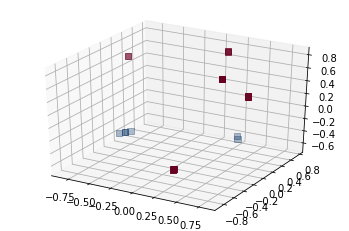

In [0]:
#For 2 clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, marker="s", c=labels_2, s=40, cmap="RdBu")
plt.show()

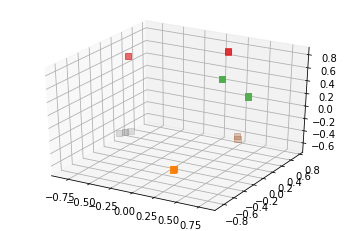

In [0]:
#For 5 clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, marker="s", c=labels_5, s=40, cmap="Set1")
plt.show()